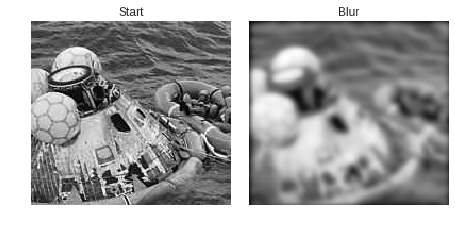

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.signal as signal
import numpy as n
import matplotlib.cm as cm
import math

import urllib2
import matplotlib.pyplot as plt

f1 = urllib2.urlopen("https://raw.githubusercontent.com/m0r9un/blur-deblur/master/y1.png")

img=mpimg.imread(f1)
#extract grey values
blurImg = img[:,:,0]

def gaussian2D(x, y, sigma):
    return (1.0/(1*math.pi*(sigma**2)))*math.exp(-(1.0/(2*(sigma**2)))*(x**2 + y**2))
  
"""make matrix from function (sample of function)"""
def receptiveFieldMatrix(func):
    h = 30
    g = n.zeros((h,h))
    for xi in range(0,h):
        for yi in range(0,h):
            x = xi-h/2
            y = yi-h/2
            g[xi, yi] = func(x,y);
    return g
  
def plotFilter(fun):
    g = receptiveFieldMatrix(fun) 
    plt.imshow(g, cmap=cm.Greys_r)
    
Img_blurGaussian = signal.convolve(blurImg,receptiveFieldMatrix(lambda x,y: gaussian2D(x,y,3)), mode='same')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

plt.gray()

ax[0].imshow(blurImg, cmap=cm.Greys_r)
ax[0].axis('off')
ax[0].set_title('Start')

ax[1].imshow(Img_blurGaussian, cmap=cm.Greys_r)
ax[1].axis('off')
ax[1].set_title('Blur')

fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)

plt.show()

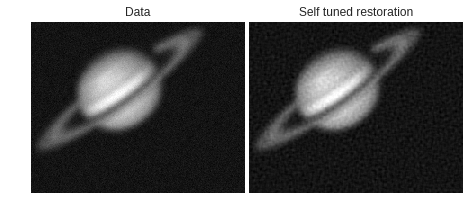

In [7]:
#@title Default title text
import numpy as np
import matplotlib.pyplot as plt

from skimage import color, data, restoration
import urllib2

import matplotlib.image as mpimg
import scipy.signal as signal
import matplotlib.cm as cm
import math


f3 = urllib2.urlopen("https://raw.githubusercontent.com/m0r9un/blur-deblur/master/y11.png")
imge=mpimg.imread(f3)
#extract grey values
test = imge[:,:,0]

deblur = color.rgb2gray(test)
from scipy.signal import convolve2d as conv2
psf = np.ones((5, 5)) / 25
deblur = conv2(deblur, psf, 'same')
deblur += 0.1 * deblur.std() * np.random.standard_normal(deblur.shape)

deconvolved, _ = restoration.unsupervised_wiener(deblur, psf)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))

plt.gray()

ax[0].imshow(deblur, vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(deconvolved)
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')

fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)

plt.show()